# How to use SHERPA simulation code #

At first you need to create a python environment, to be able to run the code.

Then, the steps to run the code are:
- load required libraries
- load basecase emissions and concentrations
- load the source-receptor model to be used
- define reduction areas and percentage of reductions by sector-pollutant
- define output directory
- run the model and inspect results

The example below works for PM2.5 yearly averages, and only for module 1. Please note that in the example below also additional python commands, are used, i.e. to show the content of the variables required by module 1.

Note that module 1 can also be run for yearly averages of PM10, NO2, NO, O3, and for other modules.

All final concentrations are in microg/m3, but O3 that is in ppb.

### Set-up of the python environment

Install a package manager, as i.e. from https://docs.conda.io/en/latest/miniconda.html

In your windows shell, run the following command (to create a python environment, using the packages as in 'environment.yml')  
*conda env create --prefix C:\PATH_ANACONDA\envs\py310-sherpa -f environment.yml*

In your windows shell, activate the environment  
*conda activate py310-sherpa*

### Run module 1
After setting up the environment, you can then run module 1 through the following steps.

In [5]:
#import required libraries
import xarray as xr
import pandas as pd
import os
import matplotlib.pyplot as plt
from module1 import module1

In [6]:
#load basecase emissions 
path_emission_cdf_test = './input/BC_emiss/BCemis_emepV434_camsV42_01_005_SecEmis.nc'
emis = xr.open_dataset(path_emission_cdf_test)
emis

<xarray.Dataset>
Dimensions:     (longitude: 521, latitude: 781, GNFRsector: 12)
Coordinates:
  * longitude   (longitude) float64 -15.05 -14.95 -14.85 ... 36.75 36.85 36.95
  * latitude    (latitude) float64 32.48 32.53 32.58 32.63 ... 71.38 71.43 71.48
  * GNFRsector  (GNFRsector) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    NOx         (GNFRsector, latitude, longitude) float32 ...
    NMVOC       (GNFRsector, latitude, longitude) float32 ...
    NH3         (GNFRsector, latitude, longitude) float32 ...
    PPM25       (GNFRsector, latitude, longitude) float32 ...
    PPMco       (GNFRsector, latitude, longitude) float32 ...
    PPM10       (GNFRsector, latitude, longitude) float32 ...
    SOx         (GNFRsector, latitude, longitude) float32 ...

In [7]:
#load basecase concentrations
path_base_conc_cdf_test = './input/BC_concs/BCconc_emepV434_camsv42_01005_SURF_ug_PM25_rh50.nc'
conc = xr.open_dataset(path_base_conc_cdf_test)
conc

<xarray.Dataset>
Dimensions:    (longitude: 521, latitude: 781)
Coordinates:
  * longitude  (longitude) float64 -15.05 -14.95 -14.85 ... 36.75 36.85 36.95
  * latitude   (latitude) float64 32.48 32.53 32.58 32.63 ... 71.38 71.43 71.48
Data variables:
    conc       (latitude, longitude) float32 ...

In [8]:
#load the SRR model
path_model_cdf_test = './input/SRR/SR_SURF_ug_PM25_rh50.nc' 
srr = xr.open_dataset(path_model_cdf_test)
srr

<xarray.Dataset>
Dimensions:  (latitude: 781, longitude: 521, pollutant: 5)
Dimensions without coordinates: latitude, longitude, pollutant
Data variables:
    lat      (latitude, longitude) float64 ...
    lon      (latitude, longitude) float64 ...
    alpha    (pollutant, latitude, longitude) float64 ...
    omega    (pollutant, latitude, longitude) float64 ...
Attributes: (12/14)
    date_of_production:                  Wed Jun 15 09:47:14 2022
    flag_weight_used:                    False
    step1_receptor_window:               0
    step1_area_of_influence:             25
    step1_algorithm_for_training:        omega slidind per pollutant, compute...
    step1_omega_physical_intepretation:  omega specifies the slope of the bel...
    ...                                  ...
    step2_algorithm_for_training:        alpha optimized per cell, all scenar...
    step2_alpha_physical_intepretation:  alpha specifies the precursor relati...
    flag_used_to_mask_sea_cells:         input/emepV434_camsV42withCond_01005...
    name_of_the_test:                    20220615_step1_omegaPerPoll_aggRes_p...
    Order_Pollutant:                     NOx, NMVOC, NH3, PPM25, SOx
    Radius_of_influence:                 100

In [9]:
#define reduction area
path_area_cdf_test = './input/reduction_areas/emiRedOn_01005_Germany.nc'#London_emepCams_0_100_FLIP.nc'
area = xr.open_dataset(path_area_cdf_test)
area

<xarray.Dataset>
Dimensions:    (longitude: 521, latitude: 781)
Coordinates:
  * longitude  (longitude) float64 -15.05 -14.95 -14.85 ... 36.75 36.85 36.95
  * latitude   (latitude) float64 32.48 32.53 32.58 32.63 ... 71.38 71.43 71.48
Data variables:
    AREA       (latitude, longitude) float32 ...

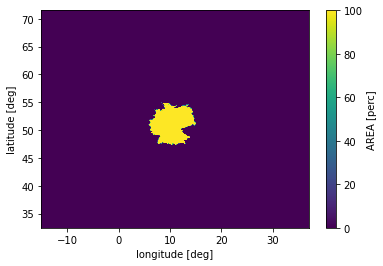

In [10]:
#show selected area
area['AREA'].plot()

In [11]:
#define percentage reductions
path_reduction_txt_test = './input/reduction_perc/user_reduction_GNFR_all_PPM25.txt'#user_reduction_GNFR_all.txt'
pd.read_csv(path_reduction_txt_test, sep='\t')

,POLL,GNFR1,GNFR2,GNFR3,GNFR4,GNFR5,GNFR6,GNFR7,GNFR8,GNFR9,GNFR10,GNFR11,GNFR12
0,NOx,35,35,35,35,35,35,35,35,35,35,35,35
1,NMVOC,35,35,35,35,35,35,35,35,35,35,35,35
2,NH3,35,35,35,35,35,35,35,35,35,35,35,35
3,PPM25,35,35,35,35,35,35,35,35,35,35,35,35
4,SOx,35,35,35,35,35,35,35,35,35,35,35,35


In [12]:
#define output area and downscaling (not implemented now)
path_result_cdf_test = './output/'
downscale_request = 0 # 0 if you do not need downscale, 1 if you need downscale but only for PM concentrations

In [13]:
#run the model and inspect the results - running time 1 minute
res = module1(path_emission_cdf_test, path_area_cdf_test, path_reduction_txt_test, path_base_conc_cdf_test, path_model_cdf_test, path_result_cdf_test,
                downscale_request)


In [15]:
#inspect results, in output file
os.listdir('output')

['DCconc_emepV434_camsV42_SURF_ug_PM25_rh50.nc',
 'DCemis_emepV434_camsV42_SURF_ug_PM25_rh50.nc']

In [16]:
#show content of result file
pm25_delta_conc = xr.open_dataset('output/DCconc_emepV434_camsV42_SURF_ug_PM25_rh50.nc')
pm25_delta_conc

<xarray.Dataset>
Dimensions:     (latitude: 781, longitude: 521)
Coordinates:
  * latitude    (latitude) float32 32.47 32.53 32.58 32.62 ... 71.38 71.43 71.47
  * longitude   (longitude) float32 -15.05 -14.95 -14.85 ... 36.75 36.85 36.95
Data variables:
    delta_conc  (latitude, longitude) float32 ...

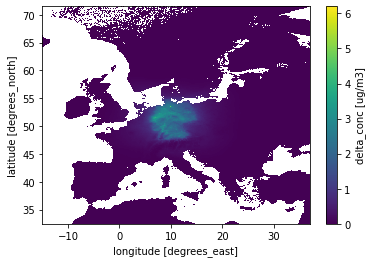

In [17]:
#show delta concentrations
pm25_delta_conc['delta_conc'].plot()
